In [22]:
import sys
sys.path.append('./../')

import ikamoana
import matplotlib.pyplot as plt

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug
from ikamoana.utils import fieldToDataArray, convertToMeters

In [2]:
configuration_filepath = "/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_config/IkaSim_Example_Fish.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [4]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [11]:
diff_y_ika = fieldToDataArray(my_sim.ocean.Ky)
diff_y_sea = seapodymFieldConstructor('../data/SEAPODYM_data/output/run-interim_2x30d_po/skj_diffusion.dym')
diff_y_sea = diff_y_sea.loc[:,50.5:-39.5,119.5:289.5]
diff_y_sea = convertToMeters(diff_y_sea, timestep=30*24*60*60, square=True)

In [33]:
diff_y_ika.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2003-01-15
  * lat      (lat) float32 -39.5 -37.5 -35.5 -33.5 -31.5 ... 44.5 46.5 48.5 50.5
  * lon      (lon) float32 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5

In [34]:
diff_y_sea.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2003-01-15
  * lat      (lat) float32 50.5 48.5 46.5 44.5 42.5 ... -33.5 -35.5 -37.5 -39.5
  * lon      (lon) float32 119.5 121.5 123.5 125.5 ... 283.5 285.5 287.5 289.5

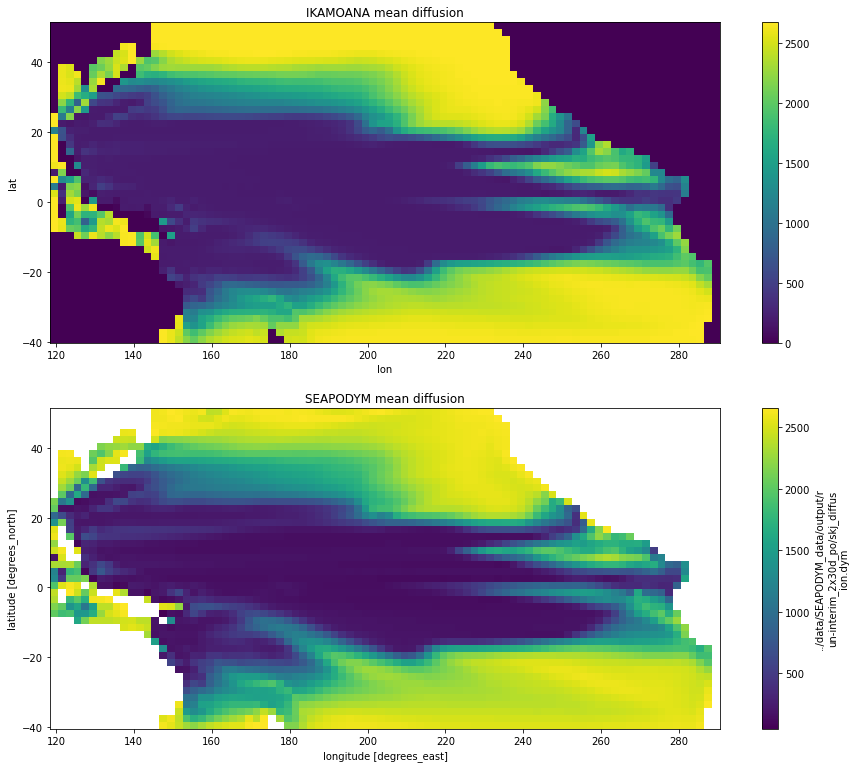

In [32]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,13))

abs(diff_y_ika).mean(axis=0).plot(ax=ax1)
abs(diff_y_sea).mean(axis=0).plot(ax=ax2)

ax1.set_title("IKAMOANA mean diffusion")
ax2.set_title("SEAPODYM mean diffusion")

plt.show()